In [1]:
import argparse
import cv2 
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import sys
import logging as log
import pandas as pd
from openvino.inference_engine import IENetwork, IECore
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
root = os.path.split(os.getcwd())[0]
INPUT_STREAM = os.path.join(root,"input\\test_video_1.mp4")
OUTPUT_STREAM = os.path.join(root,"output\\out_new_1.mp4")
CPU_EXTENSION = "C:\\Program Files (x86)\\IntelSWTools\\openvino_2019.3.379\\deployment_tools\\inference_engine\\bin\\intel64\\Release\\cpu_extension_avx2.dll"

In [2]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [3]:
def convert_color(color_string):
    colors = {"BLUE": (255,0,0), "GREEN": (0,255,0), "RED": (0,0,255)}
    out_color = colors.get(color_string)
    if out_color:
        return out_color
    else:
        return colors['BLUE']

In [4]:
args_m = os.path.join(root,'model\\face-detection-retail-0005.xml')
args_i = INPUT_STREAM
args_d = 'CPU'
args_ct = 0.6 
args_c = 'BLUE'
args_c = convert_color(args_c)
args_ct = float(args_ct)

In [5]:
device = args_d
model_xml = args_m
model_bin = os.path.splitext(model_xml)[0] + ".bin"
plugin = IECore()
plugin.add_extension(CPU_EXTENSION, device)
network = IENetwork(model=model_xml, weights=model_bin)
exec_network = plugin.load_network(network, device)
input_blob = list(network.inputs.keys())[0]
output_blob = list(network.outputs.keys())[0]

In [6]:
net_input_shape = network.inputs[input_blob].shape
net_output_shape = network.outputs[output_blob].shape

In [7]:
def async_inference(image):
    exec_network.start_async(request_id=0, 
        inputs={input_blob: image})
    return


def wait():
    status = exec_network.requests[0].wait(-1)
    return status

In [8]:
device = 'CPU'
model_xml_1 =  os.path.join(root,'model\\age-gender-recognition-retail-0013.xml')
model_bin_1 = os.path.splitext(model_xml_1)[0] + ".bin"
plugin_1 = IECore()
plugin_1.add_extension(CPU_EXTENSION, device)
network_1 = IENetwork(model=model_xml_1, weights=model_bin_1)
exec_network_1 = plugin.load_network(network_1, device)
input_blob_1 = list(network_1.inputs.keys())[0]
output_blob_1 = list(network_1.outputs.keys())

In [9]:
def async_inference_1(image):
    exec_network_1.start_async(request_id=0, 
        inputs={input_blob_1: image})
    return


def wait_1():
    status = exec_network_1.requests[0].wait(-1)
    return status

In [10]:
gen = {0:'female',1:'male'}
net_input_shape_1 = network_1.inputs[input_blob_1].shape
print(f"Input shape:{net_input_shape_1}")
for i in output_blob_1:
    net_output_shape_1 = network_1.outputs[i].shape
    print(f"Blob :{i} -> Output shape: {net_output_shape_1}")

Input shape:[1, 3, 62, 62]
Blob :age_conv3 -> Output shape: [1, 1, 1, 1]
Blob :prob -> Output shape: [1, 2, 1, 1]


In [11]:
device = 'CPU'
model_xml_2 =  os.path.join(root,'model\\emotions-recognition-retail-0003.xml')
model_bin_2 = os.path.splitext(model_xml_2)[0] + ".bin"
plugin_2 = IECore()
plugin_2.add_extension(CPU_EXTENSION, device)
network_2 = IENetwork(model=model_xml_2, weights=model_bin_2)
exec_network_2 = plugin.load_network(network_2, device)
input_blob_2 = list(network_2.inputs.keys())[0]
output_blob_2 = list(network_2.outputs.keys())

In [12]:
def async_inference_2(image):
    exec_network_2.start_async(request_id=0, 
        inputs={input_blob_2: image})
    return


def wait_2():
    status = exec_network_2.requests[0].wait(-1)
    return status

In [13]:
emo = {0:'neutral',1:'happy',2:'sadness',3:'surprise',4:'anger'}
net_input_shape_2 = network_2.inputs[input_blob_2].shape
print(f"Input shape:{net_input_shape_2}")
for i in output_blob_2:
    net_output_shape_2 = network_2.outputs[i].shape
    print(f"Blob :{i} -> Output shape: {net_output_shape_2}")

Input shape:[1, 3, 64, 64]
Blob :prob_emotion -> Output shape: [1, 5, 1, 1]


In [14]:
device = 'CPU'
model_xml_3 =  os.path.join(root,'model\\face-reidentification-retail-0095.xml')
model_bin_3 = os.path.splitext(model_xml_3)[0] + ".bin"
plugin_3 = IECore()
plugin_3.add_extension(CPU_EXTENSION, device)
network_3 = IENetwork(model=model_xml_3, weights=model_bin_3)
exec_network_3 = plugin.load_network(network_3, device)
input_blob_3 = list(network_3.inputs.keys())[0]
output_blob_3 = list(network_3.outputs.keys())

In [15]:
def async_inference_3(image):
    exec_network_3.start_async(request_id=0, 
        inputs={input_blob_3: image})
    return


def wait_3():
    status = exec_network_3.requests[0].wait(-1)
    return status

In [16]:
net_input_shape_3 = network_3.inputs[input_blob_3].shape
print(f"Input shape:{net_input_shape_3}")
for i in output_blob_3:
    net_output_shape_3 = network_3.outputs[i].shape
    print(f"Blob :{i} -> Output shape: {net_output_shape_3}")

Input shape:[1, 3, 128, 128]
Blob :658 -> Output shape: [1, 256, 1, 1]


In [17]:
def draw_boxes(frame, result,args_ct, width, height):
    faces = []
    org = []
    frame_new = np.copy(frame)
    for i,box in enumerate(result[output_blob][0][0]):
        conf = box[2]
        if conf >= args_ct:
            xmin = int(box[3] * width)
            ymin = int(box[4] * height)
            xmax = int(box[5] * width)
            ymax = int(box[6] * height)
            h = xmax - xmin
            w = ymax - ymin
            x = int(xmin - (h*0.5*0.2))
            y = int(ymin - (w*0.5*0.2))
            h = int(h * 1.2)
            w = int(w * 1.2)
            x = np.clip(x,0,width)
            y = np.clip(y,0,height)
            h = np.clip(h,0,width)
            w = np.clip(w,0,height)
            faces.append(frame_new[y:y+w,x:x+h])
            org.append([x,y,h,w])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), args_c, 2)
            
    return frame,faces,org

In [18]:
def age_gender(frame,faces,org):
    for i in range(len(faces)):
        p_frame = cv2.resize(faces[i], (net_input_shape_1[3], net_input_shape_1[2]))
        p_frame = p_frame.transpose((2,0,1))
        async_inference_1(p_frame)
        if wait_1() ==0:
            result_1 = exec_network_1.requests[0].outputs
            if result_1[output_blob_1[1]].squeeze().any()>0.8:
                text = f"{gen[np.argmax(result_1[output_blob_1[1]].squeeze())]}"
                #,{int(result_1[output_blob_1[0]].squeeze()*100)}"
                cv2.putText(frame,text,(org[i][0],org[i][1]),cv2.FONT_HERSHEY_SIMPLEX,1,convert_color("GREEN"),2)
    return frame,faces,org

In [19]:
face_db = []
emo_db = {}
actual_face = []
def face_emo_detect(face,e):
    flag = 0
    p_frame = cv2.resize(face, (net_input_shape_3[3], net_input_shape_3[2]))
    p_frame = p_frame.transpose((2,0,1))
    async_inference_3(p_frame)
    if wait_3() ==0:
        result_3 = exec_network_3.requests[0].outputs
        result_3 = result_3[output_blob_3[0]].squeeze().reshape(1,-1)
        for j in range(len(face_db)):
            if cosine_similarity(face_db[j],result_3)>0.4:
                flag = 1
                emo_db[j].append(e)
        if flag==0:
            face_db.append(result_3)
            emo_db[(len(face_db)-1)] = [e]
            actual_face.append(face)
    return

In [20]:
def emotion(frame,faces,org):
    frame,faces,org = age_gender(frame,faces,org)
    count = []
    for i in range(len(faces)):
        p_frame = cv2.resize(faces[i], (net_input_shape_2[3], net_input_shape_2[2]))
        p_frame = p_frame.transpose((2,0,1))
        async_inference_2(p_frame)
        if wait_2() ==0:
            result_2 = exec_network_2.requests[0].outputs
            j  = np.argmax(result_2[output_blob_2[0]].squeeze())
            count.append(j)
            l = org[i][0]
            m = org[i][0]+20
            n = org[i][1]+org[i][3]-20
            o = org[i][1]+org[i][3]
            frame[n:o,l:m,:] = cv2.resize(cv2.imread(os.path.join(root,f"input\\{emo[j]}.png")),(20,20))
            face_emo_detect(faces[i],j)
    final_count = [0,0,0,0,0]
    for i in count:
        final_count[i] +=1
    return frame,final_count


In [21]:
def plot(frame,count):
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.gca()
    ax.axis('off')
    ax.set_ylim(0,len(count))
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    ax.bar(emo.values(),count,color='red')
    canvas.draw()
    w, h = (fig.get_size_inches() * fig.get_dpi()).astype(int)
    x = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(h,w,3)
    x = cv2.resize(x, (216,144))
    frame[276:420,504:720,2] = np.where(x[:,:,2]==0,255,frame[276:420,504:720,2])
    frame[420:450,534:564,:] = cv2.resize(cv2.imread(os.path.join(root,"input\\neutral.png")),(30,30))
    frame[420:450,568:598,:] = cv2.resize(cv2.imread(os.path.join(root,"input\\happy.png")),(30,30))
    frame[420:450,602:632,:] = cv2.resize(cv2.imread(os.path.join(root,"input\\sadness.png")),(30,30))
    frame[420:450,636:666,:] = cv2.resize(cv2.imread(os.path.join(root,"input\\surprise.png")),(30,30))
    frame[420:450,670:700,:] = cv2.resize(cv2.imread(os.path.join(root,"input\\anger.png")),(30,30))
    return frame

In [22]:
face_db = []
emo_db = {}
actual_face = []
cap = cv2.VideoCapture(args_i)
cap.open(args_i)
width = int(cap.get(3))
height = int(cap.get(4))
out = cv2.VideoWriter(OUTPUT_STREAM, 0x00000021, 18, (width,height))
i = 0
while cap.isOpened():
    flag, frame = cap.read()
    if not flag:
        break
    p_frame = cv2.resize(frame, (net_input_shape[3], net_input_shape[2]))
    p_frame = p_frame.transpose((2,0,1))
    p_frame = p_frame.reshape(1, *p_frame.shape)
    async_inference(p_frame)
    if wait() == 0:
        result = exec_network.requests[0].outputs
        frame,faces,org = draw_boxes(frame, result, args_ct, width, height)
        frame,count = emotion(frame,faces,org)
        frame = plot(frame,count)
        out.write(frame)

out.release()
cap.release()
cv2.destroyAllWindows()

The number face detected are 15


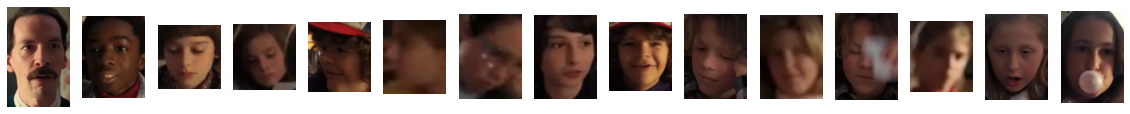

In [23]:
print(f"The number face detected are {len(actual_face)}")
j = 0
plt.figure(figsize=(20,10))
for i in actual_face:
    j = j+1
    img = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    plt.subplot(1,15,j)
    plt.imshow(img,interpolation='bilinear')
    plt.axis(False)
plt.show()    

In [28]:
def report(ind):
    plt.figure(figsize=(17,3))
    plt.subplot(1,4,1)
    img = cv2.resize(actual_face[ind], (50,50))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img,interpolation='bilinear')
    plt.axis(False)
    plt.subplot(1,4,2) 
    plt.pie(pd.value_counts(emo_db[ind]).values,labels=[emo[i] for i in pd.value_counts(emo_db[ind]).index],autopct='%1.1f%%',
           shadow=True, startangle=90)
    plt.subplot(1,4,3)
    plt.hist(emo_db[ind])
    plt.xticks(pd.value_counts(emo_db[ind]).index,[emo[i] for i in pd.value_counts(emo_db[ind]).index])
    plt.subplot(1,4,4) 
    plt.plot(emo_db[ind],'ro')
    plt.yticks(pd.value_counts(emo_db[ind]).index,[emo[i] for i in pd.value_counts(emo_db[ind]).index])
    plt.show()

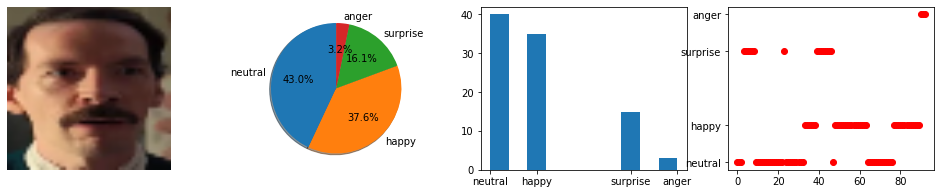

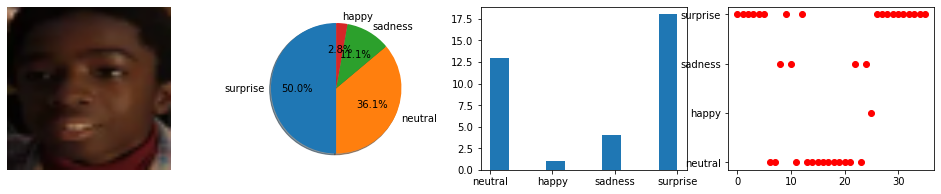

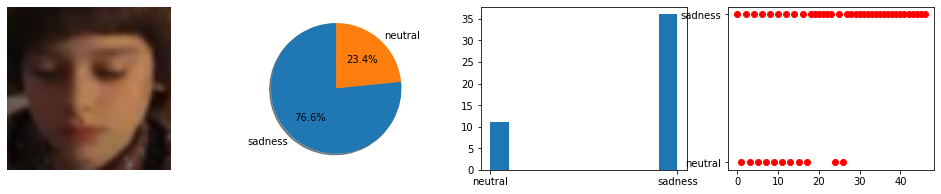

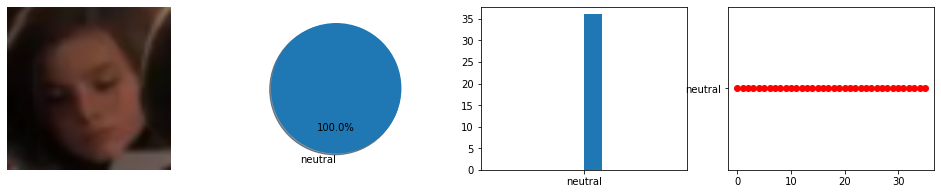

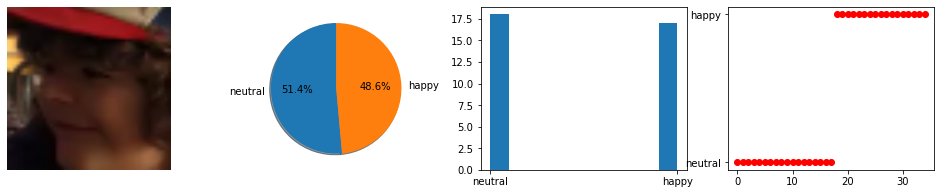

In [29]:
for i in range(5):
    report(i)

In [30]:
%%HTML
<video width="720" height="480" controls>
  <source src="../output/out_new_1.mp4" type="video/mp4">
</video>